# detect the churn cutomers


In [2]:
#import the modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")


read the data

In [3]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
#separte the features and target variables
x=df.iloc[:,3:13]
y=df.iloc[:,13]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [7]:
## feture egneering
geo=pd.get_dummies(x["Geography"],drop_first=True)
geo

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,True,False


In [8]:
gen=pd.get_dummies(x["Gender"],drop_first=True)
gen

,Male
0,False
1,False
2,False
3,False
4,False
...,...
9995,True
9996,True
9997,False
9998,True


In [9]:
x.drop(["Gender","Geography"],axis=1,inplace=True)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [10]:
x=pd.concat([x,geo,gen],axis=1,)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [11]:
x["Germany"]=x["Germany"].map({True:1,False:0})
x["Germany"].unique()

array([0, 1])

In [12]:
x["Spain"]=x["Spain"].map({True:1,False:0})
x["Spain"].unique()

array([0, 1])

In [13]:
x["Male"]=x["Male"].map({True:1,False:0})
x["Male"].unique()

array([0, 1])

In [14]:
#find the missing values
x.isnull().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Germany            0
Spain              0
Male               0
dtype: int64

In [15]:
y.isnull().sum()

np.int64(0)

In [16]:
x.dtypes


CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Germany              int64
Spain                int64
Male                 int64
dtype: object

# split the data  and feature scalling

In [17]:
#splot the train and
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [18]:
#feature scalling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [19]:
x_train.shape

(8000, 11)

# create the ANN model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LeakyReLU,PReLU,ELU,ReLU ,Dropout

In [22]:
#lets intilaize the ann
classsifier=Sequential()


In [23]:
#adding the input layer
classsifier.add(Dense(units=11,activation="relu"))   #11 faetures is there


In [ ]:
#adding the first hidden layer
classsifier.add((Dense(units=7,activation="relu")))

In [25]:
#adding the second hidden layer
classsifier.add(Dense(units=6,activation="relu"))

In [26]:
# adding the output layer
classsifier.add(Dense(units=1,activation="sigmoid"))

In [27]:
classsifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])#adan own learning rate is 0.01

In [28]:
# want to set the own optmizers
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [32]:
#early stopping --- stop twhen the acuuracy will nor incresed
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [43]:
model_history=classsifier.fit(x_test,y_test,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8551 - loss: 0.3636 - val_accuracy: 0.8578 - val_loss: 0.3394
Epoch 2/1000
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8588 - loss: 0.3487 - val_accuracy: 0.8563 - val_loss: 0.3454
Epoch 3/1000
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8626 - loss: 0.3412 - val_accuracy: 0.8593 - val_loss: 0.3425
Epoch 4/1000
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8663 - loss: 0.3364 - val_accuracy: 0.8608 - val_loss: 0.3471
Epoch 5/1000
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8648 - loss: 0.3331 - val_accuracy: 0.8563 - val_loss: 0.3457
Epoch 6/1000
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8723 - loss: 0.3297 - val_accuracy: 0.8533 - val_loss: 0.3513
Epoch 7/1000
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8708 - loss: 0.3279 - val_accuracy: 0.8502 - val_loss: 0.3478
Epoch 8/1000
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8723 - loss: 0.3238 - 

In [44]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

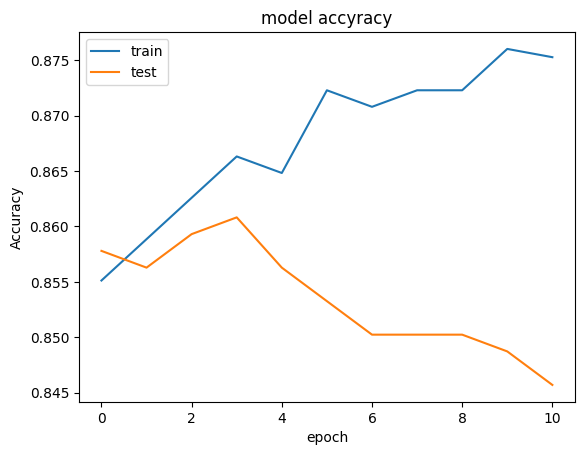

In [45]:
#summarize the history for accuracy
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("model accyracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

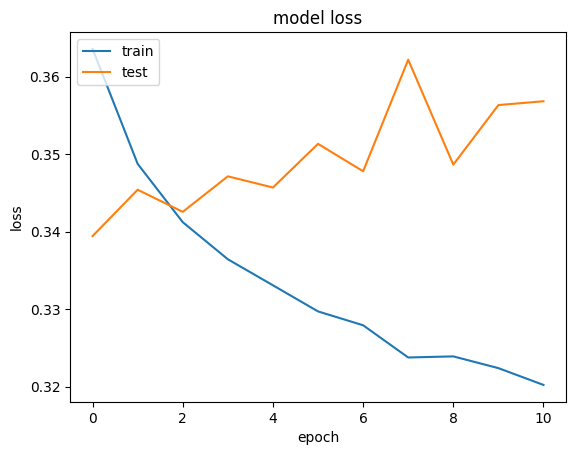

In [46]:
#summarize the history for accuracy
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

# prediction to test data

In [48]:
y_pred=classsifier.predict(x_test)
y_pred=(y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [49]:
#draw the confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score


In [51]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1548,   59],
       [ 207,  186]])

In [53]:
score=accuracy_score(y_test,y_pred)
score

0.867

In [55]:
#get the wieghts
classsifier.get_weights()


[array([[ 0.15102917, -0.03633229, -0.04221391, -0.3034717 , -0.18295275,
          0.00721754,  0.09050783,  0.0658126 ,  0.00587709,  0.16914251,
         -0.15457477],
        [ 0.7214459 , -0.6466105 ,  0.2669879 , -0.09457904, -0.43244898,
         -0.38414812, -0.8445061 , -0.45019907,  1.1505847 , -0.94099516,
         -0.20494062],
        [ 0.11611781,  0.2392962 ,  0.05677973, -0.2162908 , -0.27733493,
         -0.11321045,  0.03894728,  1.0630012 , -0.13128972,  0.15355176,
         -0.12177894],
        [ 0.09380965, -0.05449508, -0.72961485,  0.72968125,  0.4822617 ,
         -0.21121605,  0.02352421, -0.15097661, -0.01301807,  0.0312289 ,
          0.19796187],
        [ 0.63327444,  0.5151099 ,  0.12643784,  0.35388643,  0.79285794,
          1.2279843 , -0.07262164, -0.04869866,  0.97551394,  0.27350977,
          0.8549885 ],
        [-0.374505  ,  0.40872073, -0.4008779 ,  0.32753828, -0.0663811 ,
          0.14374492, -0.03356833,  0.4196895 , -0.10788536, -0.3649998

# add the cnn model

In [56]:
sklearm

NameError: name 'sklearm' is not defined